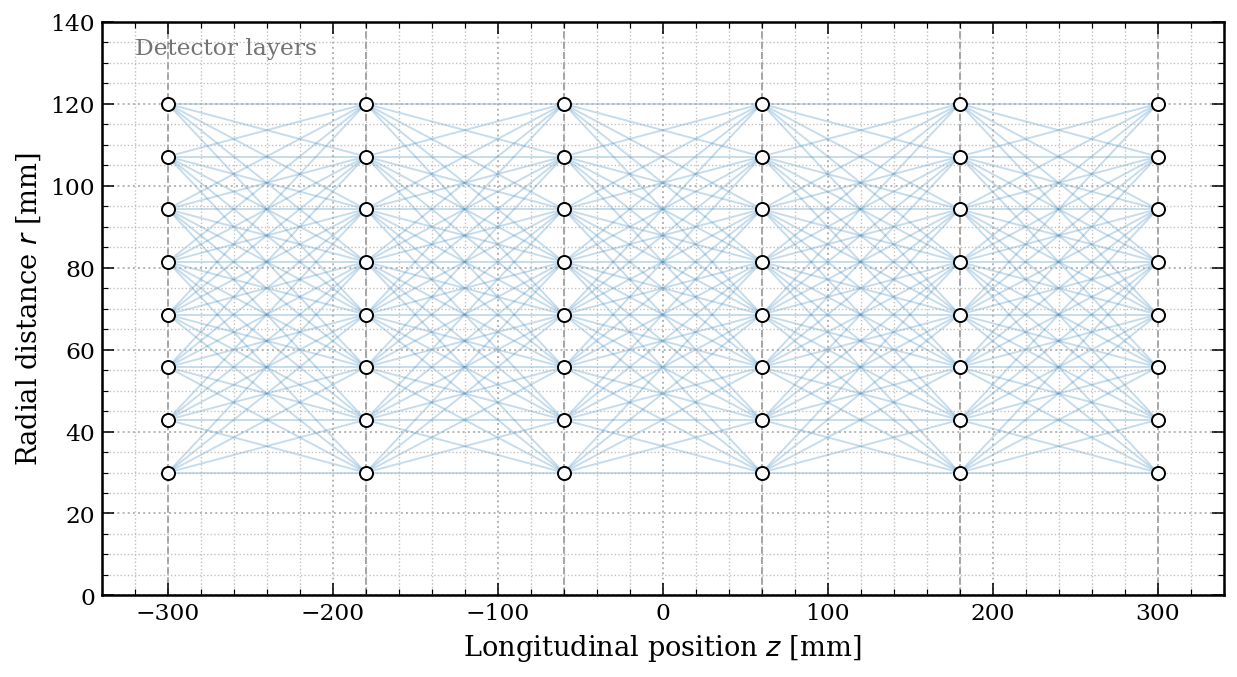

✅ fig_graph_construction.pdf generated (paper quality).


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# ✅ PAPER STYLE (consistent with your final figures)
# -------------------------------
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman", "Times", "DejaVu Serif"],

    "font.size": 12,
    "axes.labelsize": 14,
    "axes.titlesize": 14,
    "axes.titleweight": "normal",

    "axes.linewidth": 1.3,

    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,

    # ✅ visible grid
    "grid.linestyle": ":",
    "grid.linewidth": 0.95,
    "grid.alpha": 0.95,
})

def paper_axes(ax):
    ax.minorticks_on()

    # ✅ Visible dotted grid like your reference plots
    ax.grid(True, which="major", linestyle=":", linewidth=1.0, alpha=0.95)
    ax.grid(True, which="minor", linestyle=":", linewidth=0.7, alpha=0.80)

    # ✅ thick spines
    for spine in ax.spines.values():
        spine.set_linewidth(1.3)

    # ✅ HEP-style ticks
    ax.tick_params(which="both", direction="in", top=True, right=True)


np.random.seed(7)

# -------------------------
# Synthetic detector layout
# -------------------------
n_layers = 6
z_layers = np.linspace(-300, 300, n_layers)
hits_per_layer = 8

hits = []

for z in z_layers:
    r = np.linspace(30, 120, hits_per_layer)
    phi = np.random.uniform(-0.15, 0.15, hits_per_layer)
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    for xi, yi in zip(x, y):
        hits.append((z, xi, yi))

hits = np.array(hits)

# -------------------------
# Graph construction (loose constraints)
# -------------------------
edges = []
for i in range(len(hits)):
    for j in range(len(hits)):
        if hits[j, 0] > hits[i, 0]:
            dz = hits[j, 0] - hits[i, 0]
            dr = np.hypot(hits[j, 1], hits[j, 2]) - np.hypot(hits[i, 1], hits[i, 2])
            if dz < 150 and abs(dr) < 60:
                edges.append((i, j))

# -------------------------
# Plot
# -------------------------
fig, ax = plt.subplots(figsize=(9, 5), dpi=140)

# Draw detector layers (clean vertical guides)
for z in z_layers:
    ax.axvline(
        z,
        color="0.55",
        linestyle="--",
        linewidth=1.0,
        alpha=0.8,
        zorder=0
    )

# Draw edges (more visible but still subtle)
for i, j in edges:
    ax.plot(
        [hits[i, 0], hits[j, 0]],
        [np.hypot(hits[i, 1], hits[i, 2]),
         np.hypot(hits[j, 1], hits[j, 2])],
        color="tab:blue",
        alpha=0.25,          # ✅ increased visibility (was 0.15)
        linewidth=1.0,       # ✅ slightly thicker
        zorder=1
    )

# Draw hits (nodes) ✅ with black border like your scatter styling
ax.scatter(
    hits[:, 0],
    np.hypot(hits[:, 1], hits[:, 2]),
    s=45,
    facecolors="white",
    edgecolors="black",
    linewidths=1.0,
    zorder=5
)

# Labels
ax.set_xlabel(r"Longitudinal position $z$ [mm]")
ax.set_ylabel(r"Radial distance $r$ [mm]")

# Axes limits
ax.set_xlim(-340, 340)
ax.set_ylim(0, 140)

# Apply paper styling
paper_axes(ax)

# Annotations (paper style)
ax.text(-320, 132, "Detector layers", fontsize=12, color="0.45")
#ax.text(80, 18, "Hits (nodes)", fontsize=12, color="black")
#ax.text(120, 100, "Candidate edges", fontsize=12, color="0.3")

plt.tight_layout()
plt.savefig("fig_graph_construction.pdf", dpi=300, bbox_inches="tight")
plt.savefig("fig_graph_construction.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ fig_graph_construction.pdf generated (paper quality).")


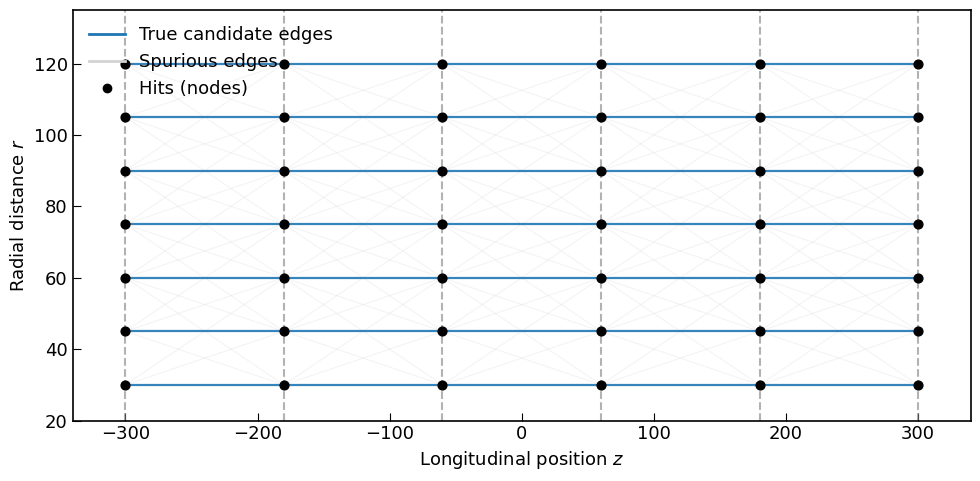

✅ Enhanced graph construction schematic generated.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# -------------------------
# Style (journal-grade)
# -------------------------
plt.rcParams.update({
    "font.size": 13,
    "axes.linewidth": 1.2,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
})

np.random.seed(4)

# -------------------------
# Detector layout
# -------------------------
n_layers = 6
z_layers = np.linspace(-300, 300, n_layers)
hits_per_layer = 7
r_layers = np.linspace(30, 120, hits_per_layer)

hits = []
labels = []

for i, z in enumerate(z_layers):
    for r in r_layers:
        hits.append((z, r))
        labels.append(i)

hits = np.array(hits)
labels = np.array(labels)

# -------------------------
# Edge construction
# -------------------------
true_edges = []
fake_edges = []

for i in range(len(hits)):
    for j in range(len(hits)):
        if labels[j] == labels[i] + 1:
            dr = abs(hits[j,1] - hits[i,1])
            if dr < 15:
                true_edges.append((i, j))
            elif dr < 45:
                fake_edges.append((i, j))

# -------------------------
# Plot
# -------------------------
fig, ax = plt.subplots(figsize=(10, 5))

# Detector layers
for z in z_layers:
    ax.axvline(z, linestyle="--", color="gray", alpha=0.6)

# Fake edges (background)
for i, j in fake_edges:
    ax.plot(
        [hits[i,0], hits[j,0]],
        [hits[i,1], hits[j,1]],
        color="lightgray",
        alpha=0.25,
        linewidth=0.8
    )

# True edges (foreground)
for i, j in true_edges:
    ax.plot(
        [hits[i,0], hits[j,0]],
        [hits[i,1], hits[j,1]],
        color="tab:blue",
        linewidth=1.6,
        alpha=0.9
    )

# Hits
ax.scatter(
    hits[:,0],
    hits[:,1],
    s=40,
    color="black",
    zorder=5
)

# Labels
ax.set_xlabel(r"Longitudinal position $z$")
ax.set_ylabel(r"Radial distance $r$")

ax.set_xlim(-340, 340)
ax.set_ylim(20, 135)

# Legend
legend_elements = [
    Line2D([0], [0], color="tab:blue", lw=2, label="True candidate edges"),
    Line2D([0], [0], color="lightgray", lw=2, label="Spurious edges"),
    Line2D([0], [0], marker="o", color="black", lw=0, label="Hits (nodes)")
]

ax.legend(handles=legend_elements, frameon=False, loc="upper left")

plt.tight_layout()
plt.savefig("fig_graph_construction.pdf")
plt.show()

print("✅ Enhanced graph construction schematic generated.")
